In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Simple Metropolis Monte Carlo

In [7]:
def buildMC(pi, num_samples, proposal_sigma, x0):
    x = np.array([x0])
    for i in range(num_samples):
        xg = np.random.normal(x[i], proposal_sigma)
        #xg = np.random.uniform(-5,5)
        u  = np.random.uniform(0,1)
        if u < pi(xg)/pi(x[i]):
            x = np.append(x, xg)
        else:
            x = np.append(x, x[i])
    return x

In [3]:
def g(x):
    return x*np.exp(-x**2/2)
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

In [4]:
x = np.linspace(0, 5, 1000)

In [8]:
samples=buildMC(g, 10000, 1, 1)

## Proposal uniform from -5,5 range

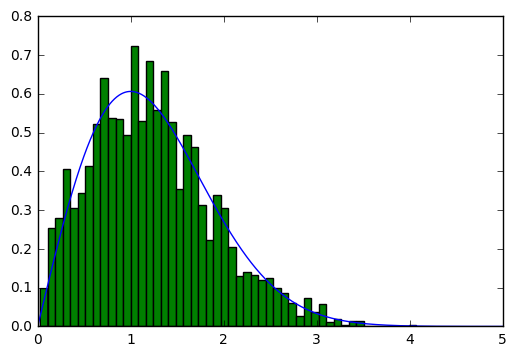

In [6]:
plt.plot(x,g(x))
plt.hist(samples, 50, normed=True)
plt.show()

## Proposal from xi neighbor, normal distribution, with sigma=1

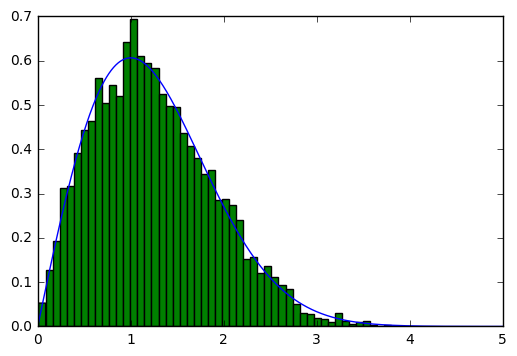

In [9]:
plt.plot(x,g(x))
plt.hist(samples, 50, normed=True)
plt.show()

# Metropolis-Hastings Monte Carlo

In [10]:
def q(xi, xj, sigma):
    return np.abs(xi-xj)*np.exp(-(xi-xj)**2/2/sigma**2)/np.sqrt(2*np.pi)/sigma

def propose(xi, sigma):
    return np.random.normal(xi, sigma)

def MH(pi, num_samples, x0, proposal_sigma):
    x = np.array([x0])
    for i in range(num_samples):
        xg = propose(x[i], proposal_sigma)
        u  = np.random.uniform(0,1)
        p  = min(1.0, (pi(xg)/pi(x[i])) * (q(x[i], xg, proposal_sigma)/q(xg, x[i], proposal_sigma)) )
        if np.random.rand()<=p:
            x = np.append(x, xg)
        else:
            x = np.append(x, x[i])
    return x

In [19]:
samples2=MH(g, 10000, 1, 1)

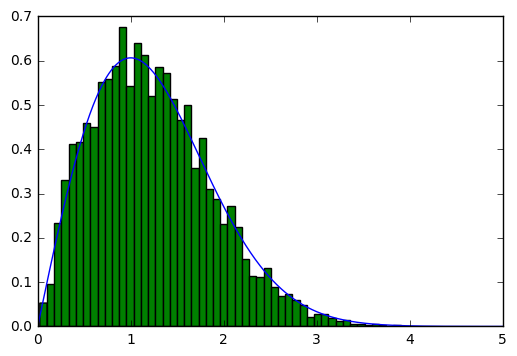

In [20]:
plt.plot(x,g(x))
plt.hist(samples2, 50, normed=True)
plt.show()